In [ ]:
# 불필요한 warnings 이 길게 출력되는 막기 위한 코드이다.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib 을 불러온다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.5 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

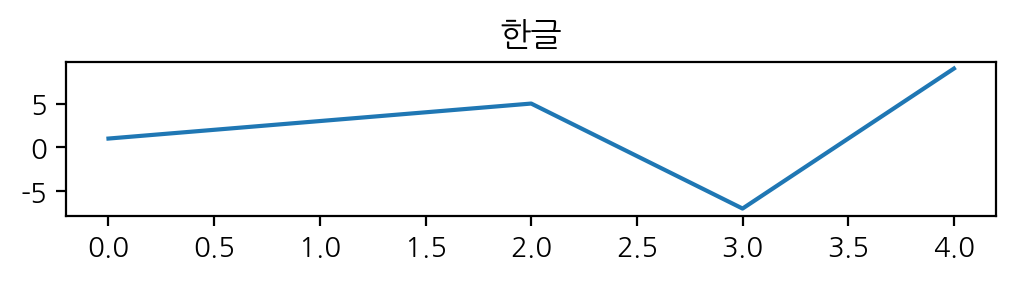

In [ ]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1, 3, 5, -7, 9]).plot(title="한글", figsize=(6, 1))

In [ ]:
# corpus : 말뭉치
# DTM(Document-Term Matrix) 문서단어행렬 (빈도)
# 5*3  (3*5)  5*5 lda >>> 가중치
# dtm >> tf-df (Term-frequency-Inverse Document Frequency)

# vector화 : 숫자로 변경
# embedding (희소행렬 대부분 0인 행렬) >> 밀집 행렬(dense)

In [ ]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "택시 승강장 문의입니다."]

In [ ]:
# fit, transform, fit_transfrom의 차이점
#* fit(): 원시 문서에 있는 모든 토큰의 어휘 사전을 배운다.
#* transform(): 문서를 문서 용어 매트릭스로 변환합니다. transform 이후엔
#매트릭스로 변환되어 숫자형태로 변경된다.
#* fit_transform(): 어휘 사전을 배우고 문서 용어 매트릭스를 반환한다.
#fit 다음에 변환이 오는 것과 동일하지만 더 효율적으로 구현된다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()
cvect.fit(corpus)
dtm = cvect.transform(corpus) #문서단어행렬
dtm

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
dtm.toarray()

array([[1, 1, 1, 0, 0, 0, 0, 2, 0],
       [0, 1, 0, 0, 1, 1, 2, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1]])

In [ ]:
cvect.vocabulary_

{'코로나': 7,
 '거리두기와': 0,
 '상생지원금': 2,
 '문의입니다': 1,
 '지하철': 6,
 '운행시간과': 5,
 '요금': 4,
 '승강장': 3,
 '택시': 8}

In [ ]:
vocab = cvect.get_feature_names_out()
vocab

array(['거리두기와', '문의입니다', '상생지원금', '승강장', '요금', '운행시간과', '지하철', '코로나',
       '택시'], dtype=object)

In [ ]:
# dtm

df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,1,1,0,0,0,0,2,0
1,0,1,0,0,1,1,2,0,0
2,0,1,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1


In [ ]:
df_dtm.sum().to_frame().T

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,4,1,2,1,1,3,2,1


In [ ]:
'''
# N-grams

* 토큰을 몇 개 사용할 것인지를 구분합니다. 지정한 n개의 숫자 만큼의 토큰을 묶어서 사용한다.
* 예를 들어 (1, 1) 이라면 1개의 토큰을 (2, 3)이라면 2~3개의 토큰을 사용한다.
* analyzer 설정에 따라 단어단위, 캐릭터 단위에 따라 사용할 수 있다.

* 기본값 = (1, 1)
* ngram_range(min_n, max_n)
* min_n <= n <= max_n
```
(1, 1) 은 1 <= n <= 1
(1, 2) 은 1 <= n <= 2
(2, 2) 은 2 <= n <= 2
'''

In [ ]:
cvect = CountVectorizer(ngram_range=(1,2)) #1<=n<=2
dtm = cvect.fit_transform(corpus)
dtm.toarray()

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0
1,0,0,1,0,0,0,0,1,1,1,1,2,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
df_dtm.sum().to_frame().T

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,4,1,1,2,2,1,1,1,1,3,1,1,1,2,1,1,1,1


In [ ]:
'''
# min_df

* 기본값=1
* min_df는 문서 빈도(문서의 %에 있음)가 지정된 임계값보다 엄격하게 낮은 용어를 무시한다.
* 예를 들어, min_df=0.66은 용어가 어휘의 일부로 간주되려면 문서의 66%에 나타나야 한다.
* 때때로 min_df가 어휘 크기를 제한하는 데 사용된다.
* 예를들어 min_df를 0.1, 0.2로 설정한다면 10%, 20%에 나타나는 용어만 학습한다.
'''

In [ ]:
'''
# max_df

* 기본값=**1**
* max_df=int : 빈도수를 의미한다.
* max_df=float : 비율을 의미한다.
* 어휘를 작성할 때 주어진 임계값보다 문서 빈도가 엄격히 높은 용어는 무시한다.
* 빈번하게 등장하는 불용어 등을 제거하기에 편리하다.
* 예를 들어 코로나 관련 기사를 분석하면 90%에 '코로나'라는 용어가 등장할 수 있는데,
* 이 경우 max_df=0.89 로 비율을 설정하여 너무 빈번하게 등장하는 단어를 제외할 수 있다.
'''

In [ ]:
#max_features : 갯수만큼의 단어만 추출
cvect = CountVectorizer(ngram_range=(1,3), min_df=0.2, max_df=5, max_features=10) #1<=n<=3
dtm = cvect.fit_transform(corpus)
dtm.toarray()

array([[1, 0, 0, 0, 2, 1, 1, 1, 1, 0],
       [1, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,문의입니다,승강장,승강장 문의입니다,지하철,코로나,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,택시
0,1,0,0,0,2,1,1,1,1,0
1,1,0,0,2,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1


In [ ]:
1 #불용어 stop_words

stop_words = ["코로나", "문의입니다"]

cvect = CountVectorizer(ngram_range=(1,3), min_df=0.2, max_df=5, max_features=10, stop_words = stop_words)
#1<=n<=3
dtm = cvect.fit_transform(corpus)
dtm.toarray()

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 2, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [ ]:
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 상생지원금,상생지원금,승강장,요금,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,지하철,지하철 승강장
0,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,2,0
2,0,0,0,1,0,0,0,0,1,1
3,0,0,0,1,0,0,0,0,0,0


In [ ]:
# annalyzer
# 기본값 'word'
# cha, char_wb

stop_words = ["코로나", "문의입니다"]

cvect = CountVectorizer(analyzer='char', ngram_range=(1,3), min_df=0.2, max_df=5, max_features=10, stop_words = stop_words)
#1<=n<=3
dtm = cvect.fit_transform(corpus)
dtm.toarray()

array([[4, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [4, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [ ]:
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,,문,문의,의,의입,의입니,입,입니,입니다,지
0,4,1,1,1,1,1,1,1,1,1
1,4,1,1,1,1,1,1,1,1,2
2,2,1,1,1,1,1,1,1,1,1
3,2,1,1,1,1,1,1,1,1,0


In [ ]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
tfidfvect.fit(corpus)
tfidfvect.transform(corpus)
dtm
dtm.toarray()

array([[4, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [4, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [ ]:
vocab = tfidfvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

ValueError: Shape of passed values is (4, 10), indices imply (4, 9)

In [ ]:
print("단어 수: ", len(vocab))

In [ ]:
print(vocab)

In [ ]:
display(df_dtm.style.background_gradient())

In [ ]:
idf = tfidfvect.idf_
idf
#하나의 문서에만 나타나는 토큰은 idf 가중치가 높다

In [ ]:
vocab = tfidfvect.get_feature_names_out()
vocab

In [ ]:
dict(zip(vocab, idf))

In [ ]:
idf_dict = dict(zip(vocab, idf))
idf_dict

In [ ]:
pd.Series(idf_dict).plot.barh() #bar+h(orizen) : 가로 막대

In [ ]:
# 최종 템플릿

tfidfvect = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_df=1.0, min_df=1)
dtm = tfidfvect.fit_transform(corpus)
vocab = tfidfvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
print("단어 수: ", len(vocab))
print(vocab)
display(df_dtm.style.background_gradient())